<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512578 entries, 0 to 9512577
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   origin_city                   int64  
 1   destination_city              int64  
 2   origin_ISO                    object 
 3   destination_ISO               object 
 4   year                          int64  
 5   commodity_index               int64  
 6   mode                          int64  
 7   container_type                int64  
 8   ship_type                     object 
 9   flow(tonne)                   float64
 10  distance(km)                  float64
 11  Mode_name                     object 
 12  IFM_HS                        object 
 13  Unit logistics costs ($/ton)  float64
 14  Model                         int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.1+ GB
None


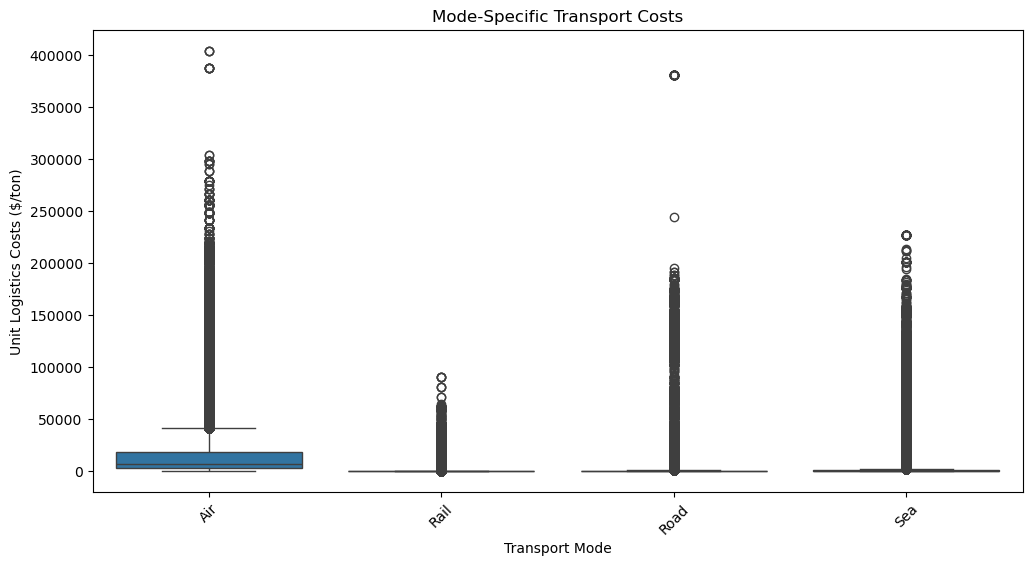

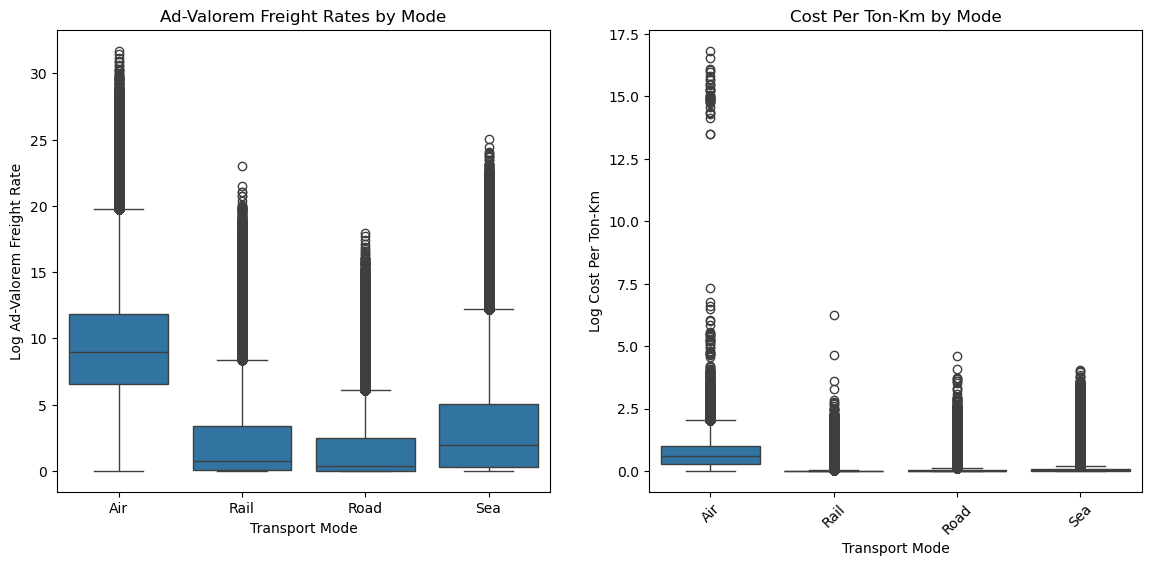

Missing Values:
 origin_city                       0
destination_city                  0
origin_ISO                        0
destination_ISO                   0
year                              0
commodity_index                   0
mode                              0
container_type                    0
ship_type                         0
flow(tonne)                       0
distance(km)                      0
Mode_name                         0
IFM_HS                            0
Unit logistics costs ($/ton)      0
Model                             0
ad_valorem_freight_rate         385
cost_per_ton_km                   0
log_Unit_logistics_costs          0
log_cost_per_ton_km               0
log_ad_valorem_freight_rate     385
dtype: int64
Outliers:
 flow(tonne)                     1852025
distance(km)                     126008
Unit logistics costs ($/ton)    1320257
Model                                 0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Summary Statistics:
         origin_city  destination_city       year  commodity_index  \
count  9.512578e+06      9.512578e+06  9512578.0     9.512578e+06   
mean   2.128146e+02      2.128146e+02     2020.0     1.236842e+01   
std    1.221296e+02      1.221296e+02        0.0     7.477761e+00   
min    1.000000e+00      1.000000e+00     2020.0     0.000000e+00   
25%    1.060000e+02      1.060000e+02     2020.0     6.000000e+00   
50%    2.130000e+02      2.130000e+02     2020.0     1.300000e+01   
75%    3.130000e+02      3.130000e+02     2020.0     2.000000e+01   
max    4.310000e+02      4.310000e+02     2020.0     2.400000e+01   

               mode  container_type   flow(tonne)  distance(km)  \
count  9.512578e+06    9.512578e+06  9.512578e+06  9.512578e+06   
mean   1.510512e+00    1.631579e+00  1.343120e+03  1.274216e+04   
std    1.307005e+00    1.223047e+00  2.042508e+04  1.422933e+04   
min    0.000000e+00    0.000000e+00  0.000000e+00  2.296630e-03   
25%    0.000000e+00   

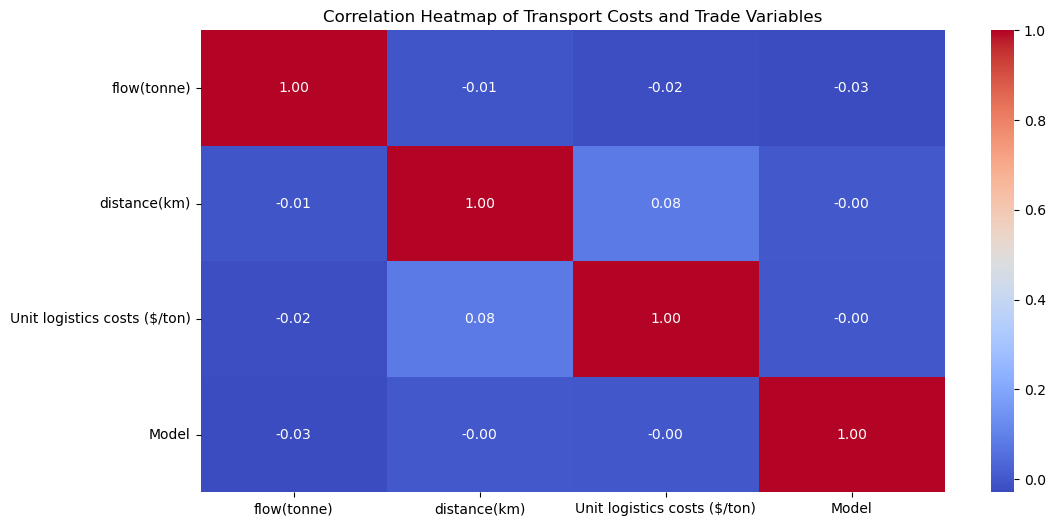

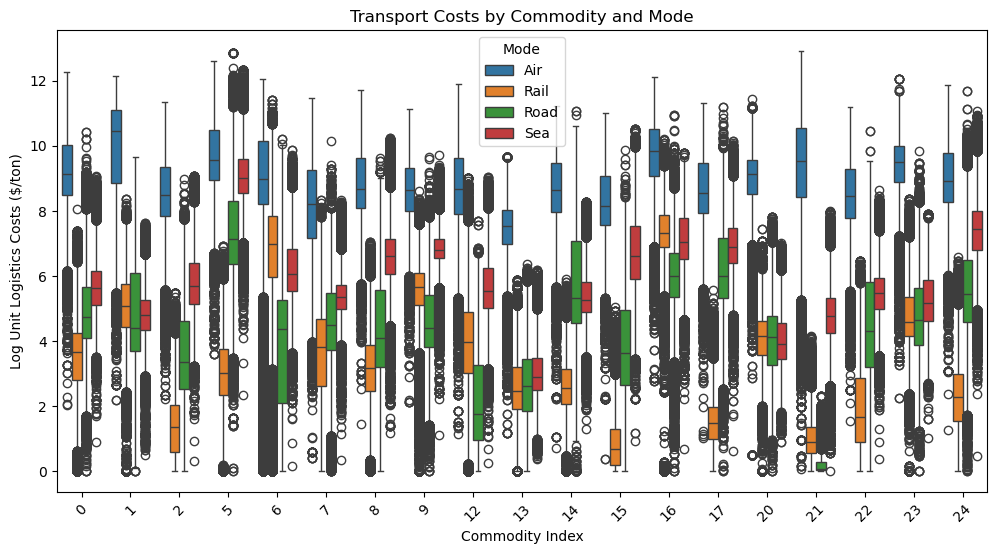

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dfset (Assuming a CSV format; adjust accordingly)
df= pd.read_csv("../../../data/imputed_full_matrix_at_centroid.csv")

# Display basic information
print(df.info())

# Convert relevant columns to numeric
numeric_cols = ['flow(tonne)', 'distance(km)', 'Unit logistics costs ($/ton)', 'Model']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Task 4: EDA for mode-specific transport costs
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_name', y='Unit logistics costs ($/ton)')
plt.xticks(rotation=45)
plt.title('Mode-Specific Transport Costs')
plt.ylabel('Unit Logistics Costs ($/ton)')
plt.xlabel('Transport Mode')
plt.show()

# Task 5: Identifying transport cost disparities using freight rate metrics
df['ad_valorem_freight_rate'] = df['Unit logistics costs ($/ton)'] / df['flow(tonne)']
df['cost_per_ton_km'] = df['Unit logistics costs ($/ton)'] / df['distance(km)']

df["log_Unit_logistics_costs"] = np.log1p(df["Unit logistics costs ($/ton)"])
df['log_cost_per_ton_km'] = np.log1p(df['cost_per_ton_km'])
df['log_ad_valorem_freight_rate'] = np.log1p(df['ad_valorem_freight_rate'])

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Mode_name', y='log_ad_valorem_freight_rate', ax=ax[0])
ax[0].set_title('Ad-Valorem Freight Rates by Mode')
ax[0].set_ylabel('Log Ad-Valorem Freight Rate')
ax[0].set_xlabel('Transport Mode')

sns.boxplot(data=df, x='Mode_name', y='log_cost_per_ton_km', ax=ax[1])
ax[1].set_title('Cost Per Ton-Km by Mode')
ax[1].set_ylabel('Log Cost Per Ton-Km')
ax[1].set_xlabel('Transport Mode')

plt.xticks(rotation=45)
plt.show()

# Task 6: Assessing data quality and detecting outliers
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Detecting outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Task 7: Generating visual reports and statistical summaries
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Transport Costs and Trade Variables')
plt.show()

# Transport cost inefficiencies and trade barriers visualization
plt.figure(figsize=(12, 6))
sns.boxplot(df=df, x='commodity_index', y='log_Unit_logistics_costs', hue='Mode_name')
plt.xticks(rotation=45)
plt.title('Transport Costs by Commodity and Mode')
plt.ylabel('Log Unit Logistics Costs ($/ton)')
plt.xlabel('Commodity Index')
plt.legend(title='Mode')
plt.show()


In [29]:
df["log_Unit_logistics_costs"] = np.log1p(df["Unit logistics costs ($/ton)"])
df['log_cost_per_ton_km'] = np.log1p(df['cost_per_ton_km'])


Mode Distribution (%):
 Mode_name
Sea     48.941293
Air     32.169870
Rail    13.874565
Road     5.014272
Name: proportion, dtype: float64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/269268633.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Mode_name', order=mode_distribution.index, palette='viridis')


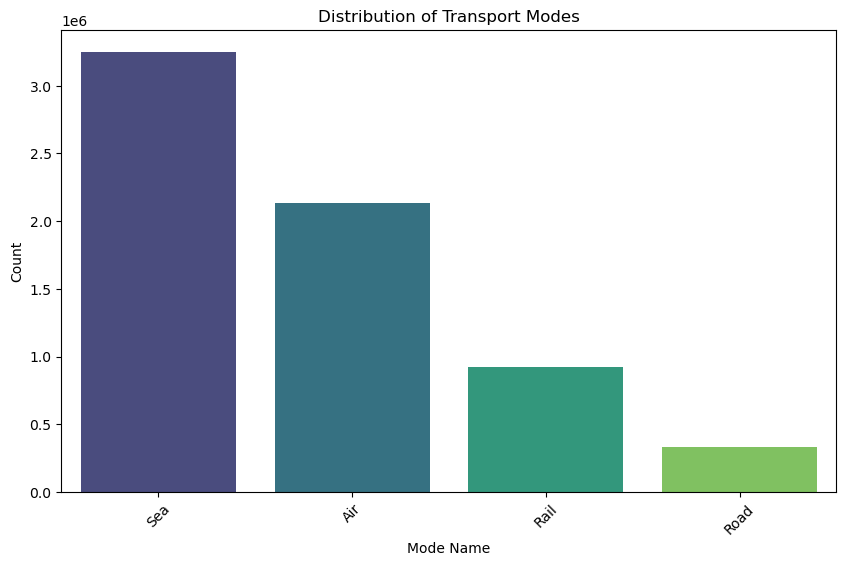

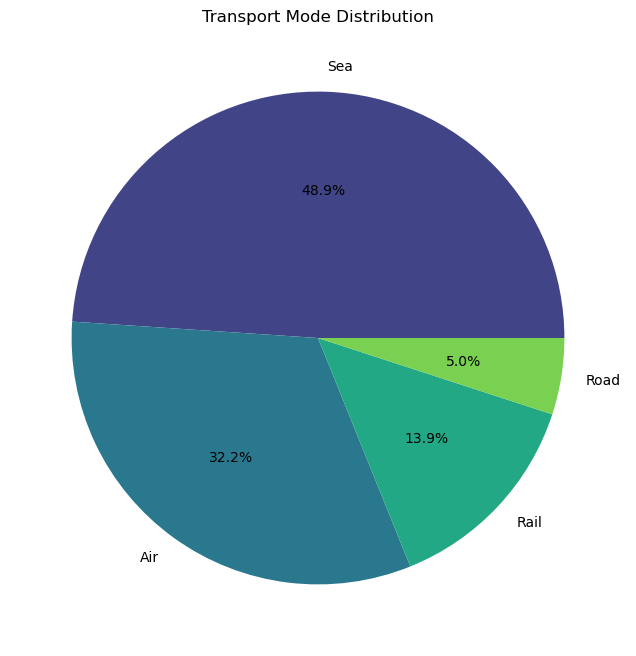

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/269268633.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mode_name', y='log_Unit_logistics_costs', palette='coolwarm')


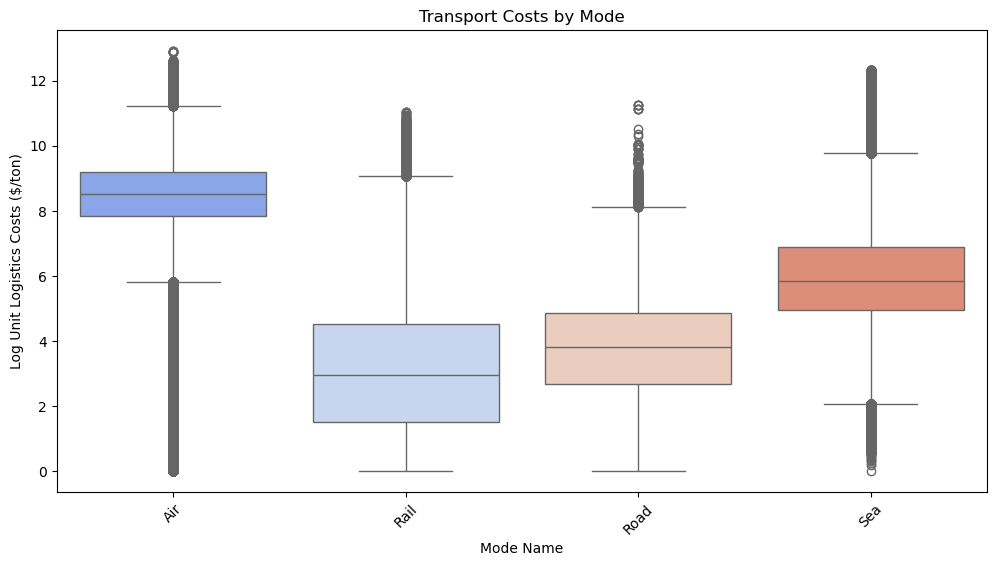

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing Mode_name values (for now)
df = df.dropna(subset=['Mode_name'])

# Get distribution of Mode_name
mode_distribution = df['Mode_name'].value_counts(normalize=True) * 100
print("Mode Distribution (%):\n", mode_distribution)

# Bar plot of transport mode distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mode_name', order=mode_distribution.index, palette='viridis')
plt.title("Distribution of Transport Modes")
plt.ylabel("Count")
plt.xlabel("Mode Name")
plt.xticks(rotation=45)
plt.show()

# Pie chart of transport mode distribution
plt.figure(figsize=(8, 8))
plt.pie(mode_distribution, labels=mode_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(mode_distribution)))
plt.title("Transport Mode Distribution")
plt.show()

# Analyze transport costs per mode
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_name', y='log_Unit_logistics_costs', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Transport Costs by Mode")
plt.ylabel("Log Unit Logistics Costs ($/ton)")
plt.xlabel("Mode Name")
plt.show()



Missing Values Summary:
                               Missing Count  Missing %
origin_city                               0   0.000000
destination_city                          0   0.000000
origin_ISO                                0   0.000000
destination_ISO                           0   0.000000
year                                      0   0.000000
commodity_index                           0   0.000000
mode                                      0   0.000000
container_type                            0   0.000000
ship_type                                 0   0.000000
flow(tonne)                               0   0.000000
distance(km)                              0   0.000000
Mode_name                                 0   0.000000
IFM_HS                                    0   0.000000
Unit logistics costs ($/ton)              0   0.000000
Model                                     0   0.000000
ad_valorem_freight_rate                 385   0.004047
cost_per_ton_km                        

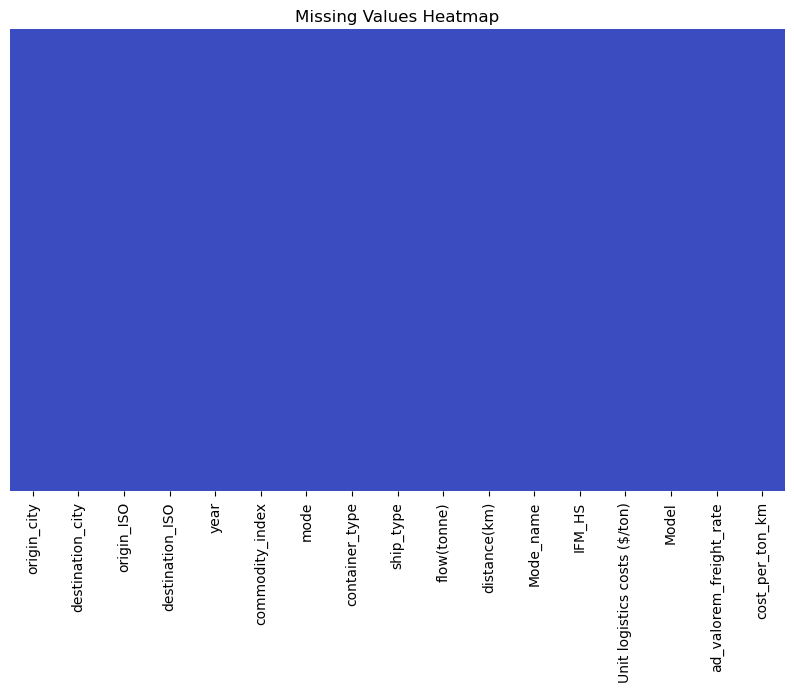


Missing values in Mode_name: 0 (0.00%)

Mode Distribution:
Mode_name
Air     3468222
Sea     3468222
Road    1388064
Rail    1188070
Name: count, dtype: int64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/3244004279.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette='viridis')


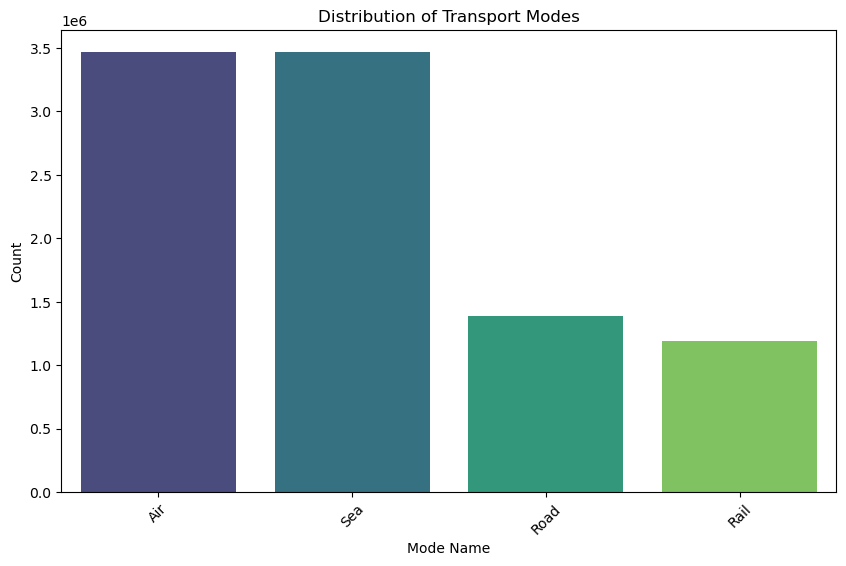

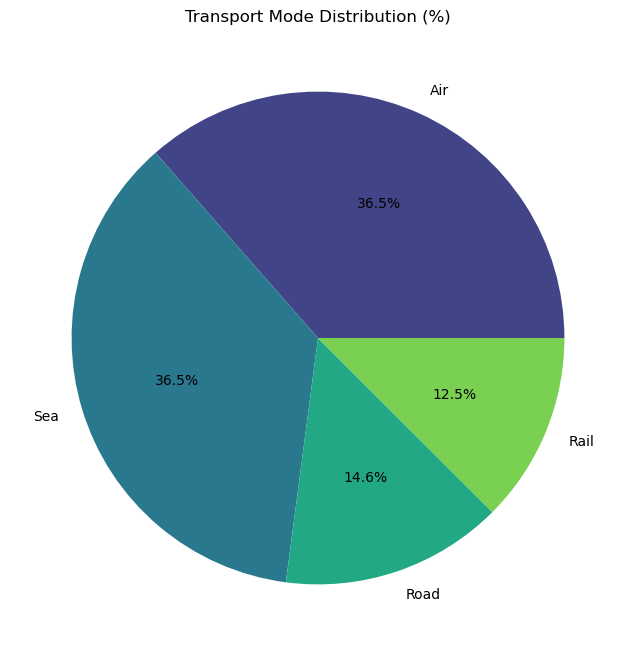

<Figure size 1200x600 with 0 Axes>

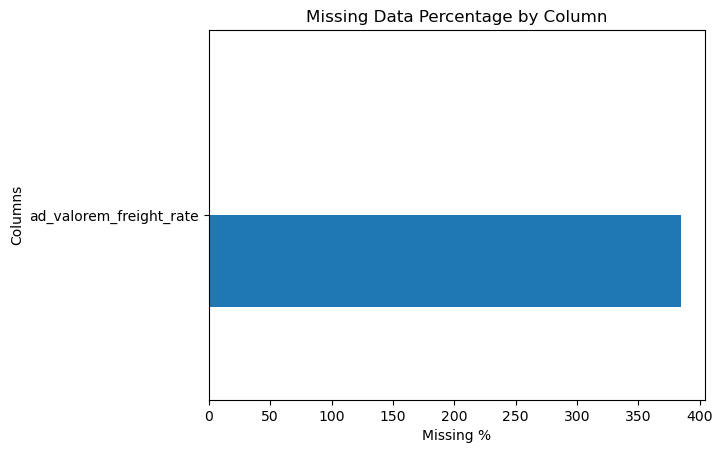

In [10]:
# Count missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({"Missing Count": missing_values, "Missing %": missing_percentage})
print("\nMissing Values Summary:\n", missing_summary)

# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Count missing values in Mode_name
mode_missing_count = df['Mode_name'].isnull().sum()
print(f"\nMissing values in Mode_name: {mode_missing_count} ({mode_missing_count/len(df)*100:.2f}%)")

# Distribution of Mode_name (Excluding Missing Values)
mode_distribution = df['Mode_name'].value_counts(dropna=True)
mode_percentage = (mode_distribution / mode_distribution.sum()) * 100

print("\nMode Distribution:")
print(mode_distribution)

# Plot Mode_name distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette='viridis')
plt.xlabel("Mode Name")
plt.ylabel("Count")
plt.title("Distribution of Transport Modes")
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Mode_name Distribution
plt.figure(figsize=(8, 8))
plt.pie(mode_percentage, labels=mode_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(mode_distribution)))
plt.title("Transport Mode Distribution (%)")
plt.show()

# Missing values count per column (bar plot)
plt.figure(figsize=(12, 6))
missing_summary[missing_summary["Missing Count"] > 0].sort_values("Missing %").plot(kind='barh', legend=False)
plt.title("Missing Data Percentage by Column")
plt.xlabel("Missing %")
plt.ylabel("Columns")
plt.show()


Missing Values:
 origin_city                     0
destination_city                0
origin_ISO                      0
destination_ISO                 0
year                            0
commodity_index                 0
mode                            0
container_type                  0
ship_type                       0
flow(tonne)                     0
distance(km)                    0
Mode_name                       0
IFM_HS                          0
Unit logistics costs ($/ton)    0
Model                           0
ad_valorem_freight_rate         0
cost_per_ton_km                 0
distance_category               0
log_Unit_logistics_costs        0
dtype: int64

Transport Mode Distribution in Africa:
 Mode_name
Sea     69890
Rail    48951
Air     42412
Road    21696
Name: count, dtype: int64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/387099010.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette="viridis")


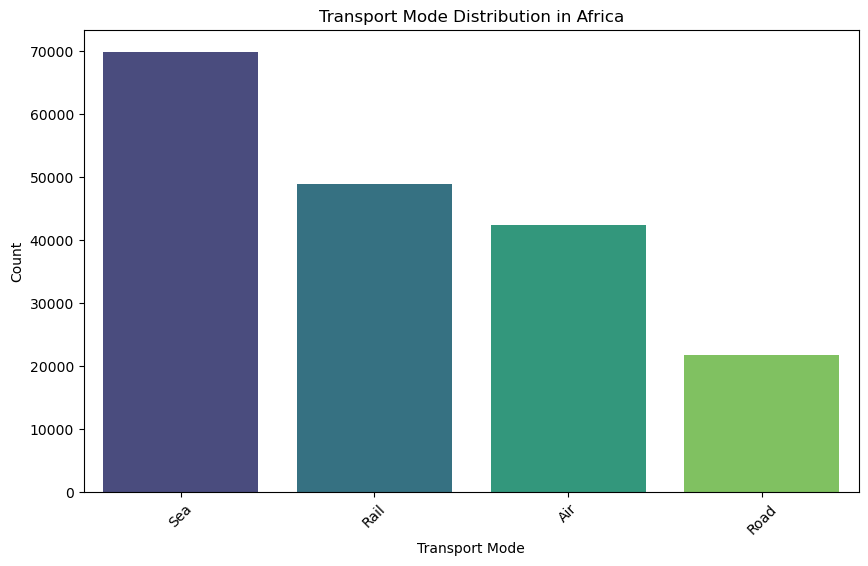

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/387099010.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="Mode_name", y="Unit logistics costs ($/ton)", palette="coolwarm")


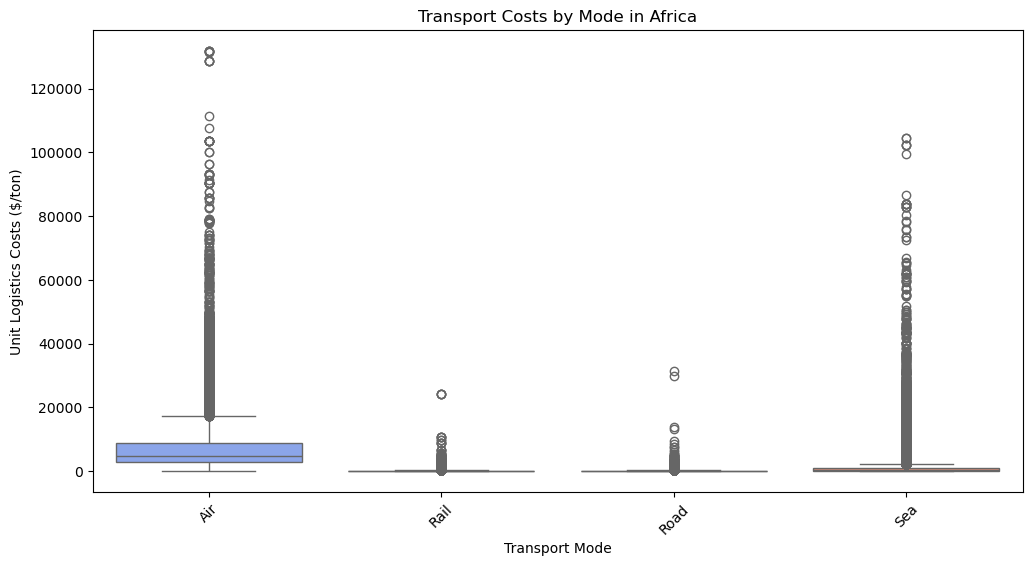

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/387099010.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")



Outliers in Transport Data:
 flow(tonne)                     30126
distance(km)                      549
Unit logistics costs ($/ton)    25351
dtype: int64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/387099010.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="landlocked", y="log_Unit_logistics_costs", palette="magma")


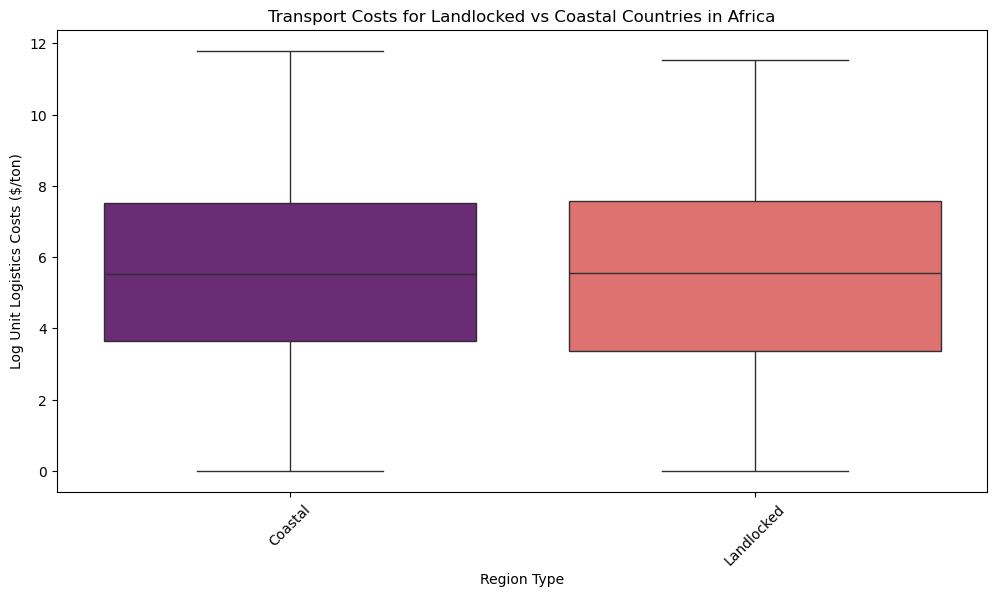

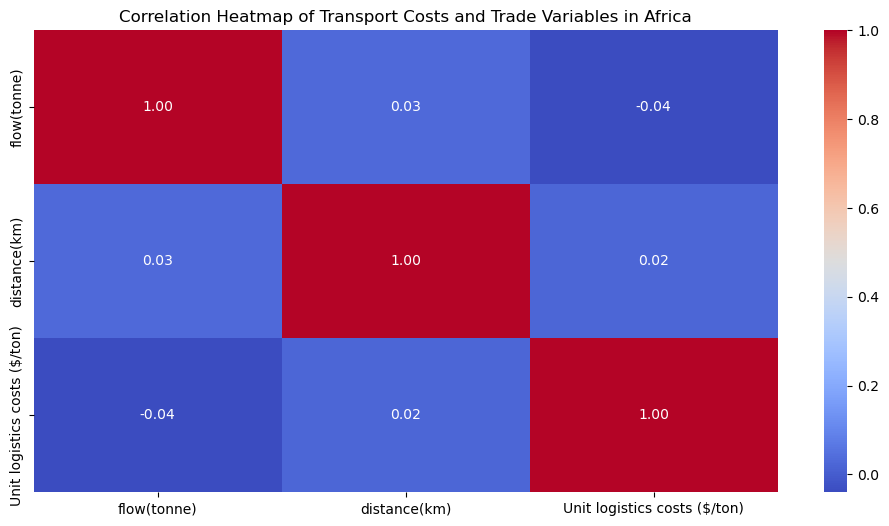

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Filter only African routes (Assuming 'origin_ISO' and 'destination_ISO' contain country codes)
african_countries = ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", "CAF", "TCD", 
                     "COM", "COG", "COD", "DJI", "EGY", "GNQ", "ERI", "ETH", "GAB", "GMB",
                     "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI",
                     "MLI", "MRT", "MUS", "MYT", "MAR", "MOZ", "NAM", "NER", "NGA", "RWA",
                     "REU", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TGO",
                     "TUN", "UGA", "TZA", "ZMB", "ZWE"]

df_africa = df[(df["origin_ISO"].isin(african_countries)) & (df["destination_ISO"].isin(african_countries))]

# Check missing values
missing_values = df_africa.isnull().sum()
print("\nMissing Values:\n", missing_values)

# 🔹 **1. Distribution of Transport Modes in Africa**
mode_distribution = df_africa["Mode_name"].value_counts()
print("\nTransport Mode Distribution in Africa:\n", mode_distribution)

# Plot transport mode distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette="viridis")
plt.xlabel("Transport Mode")
plt.ylabel("Count")
plt.title("Transport Mode Distribution in Africa")
plt.xticks(rotation=45)
plt.show()

# 🔹 **2. Cost Comparison Across Transport Modes**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_africa, x="Mode_name", y="Unit logistics costs ($/ton)", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Transport Costs by Mode in Africa")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Transport Mode")
plt.show()

# 🔹 **3. Transport Inefficiencies and Barriers (Outliers)**
# Detecting Outliers Using IQR
numeric_cols = ['flow(tonne)', 'distance(km)', 'Unit logistics costs ($/ton)']
Q1 = df_africa[numeric_cols].quantile(0.25)
Q3 = df_africa[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_africa[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_africa[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers in Transport Data:\n", outliers)

# 🔹 **4. Regional Transport Trends (Landlocked vs. Coastal)**
landlocked_countries = ["BWA", "BFA", "BDI", "CAF", "TCD", "ETH", "LSO", "MWI", "MLI", "NER", "RWA", "SSD", "UGA", "ZMB", "ZWE"]

df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")

# Boxplot for transport costs comparison between landlocked and coastal countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_africa, x="landlocked", y="log_Unit_logistics_costs", palette="magma")
plt.xticks(rotation=45)
plt.title("Transport Costs for Landlocked vs Coastal Countries in Africa")
plt.ylabel("Log Unit Logistics Costs ($/ton)")
plt.xlabel("Region Type")
plt.show()

# 🔹 **5. Correlation Analysis for Cost Determinants**
plt.figure(figsize=(12, 6))
sns.heatmap(df_africa[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Transport Costs and Trade Variables in Africa")
plt.show()



Top 10 Most Expensive Transport Routes:
 origin_ISO  destination_ISO
MAR         MOZ                12500.181769
            ZWE                10129.577320
ZAF         DZA                10095.924241
MDG         DZA                 9744.705628
MAR         AGO                 9496.890830
ZAF         MAR                 9378.124717
STP         TUN                 8708.372573
MDG         MAR                 8387.143802
KEN         CPV                 8231.016789
BDI         CPV                 8229.941737
Name: Unit logistics costs ($/ton), dtype: float64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/3649713315.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="origin_ISO", y="Unit logistics costs ($/ton)", palette="coolwarm")


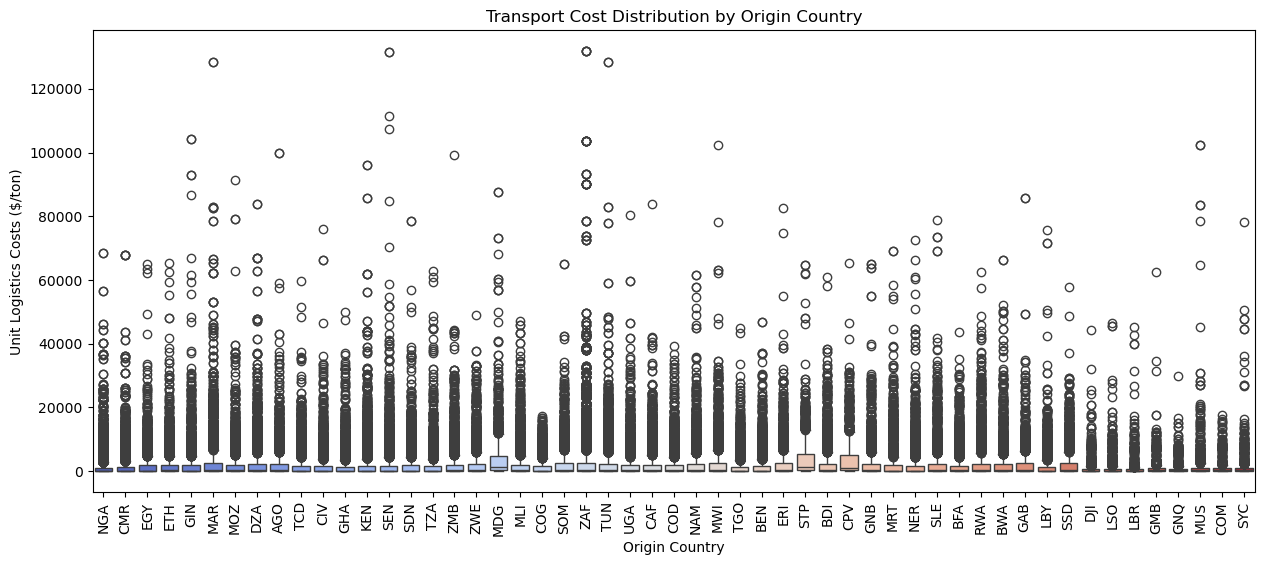

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/3649713315.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")
/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/3649713315.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="landlocked", y="log_Unit_logistics_costs", palette="magma")


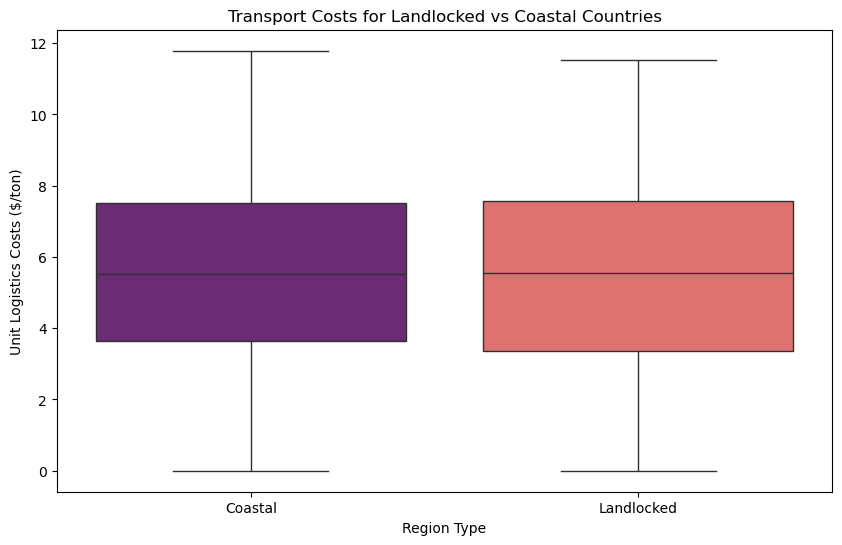

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/3649713315.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["cost_per_ton_km"] = df_africa["Unit logistics costs ($/ton)"] / df_africa["distance(km)"]



Top 10 Countries with Highest Cost per Ton-Km:
 origin_ISO
STP    0.705697
CPV    0.628068
GAB    0.597218
MDG    0.594531
BEN    0.534045
MAR    0.501581
NER    0.487556
ZAF    0.485033
BDI    0.482304
GHA    0.479119
Name: cost_per_ton_km, dtype: float64


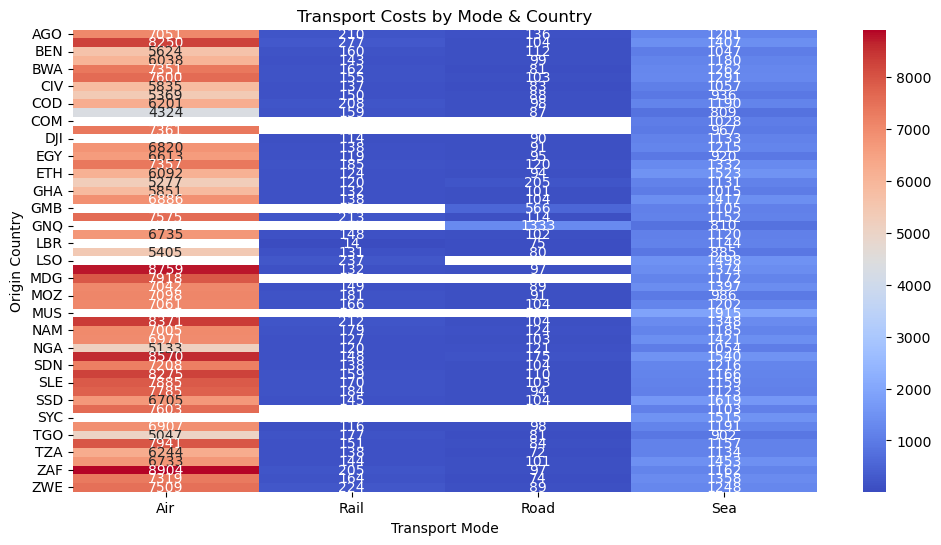

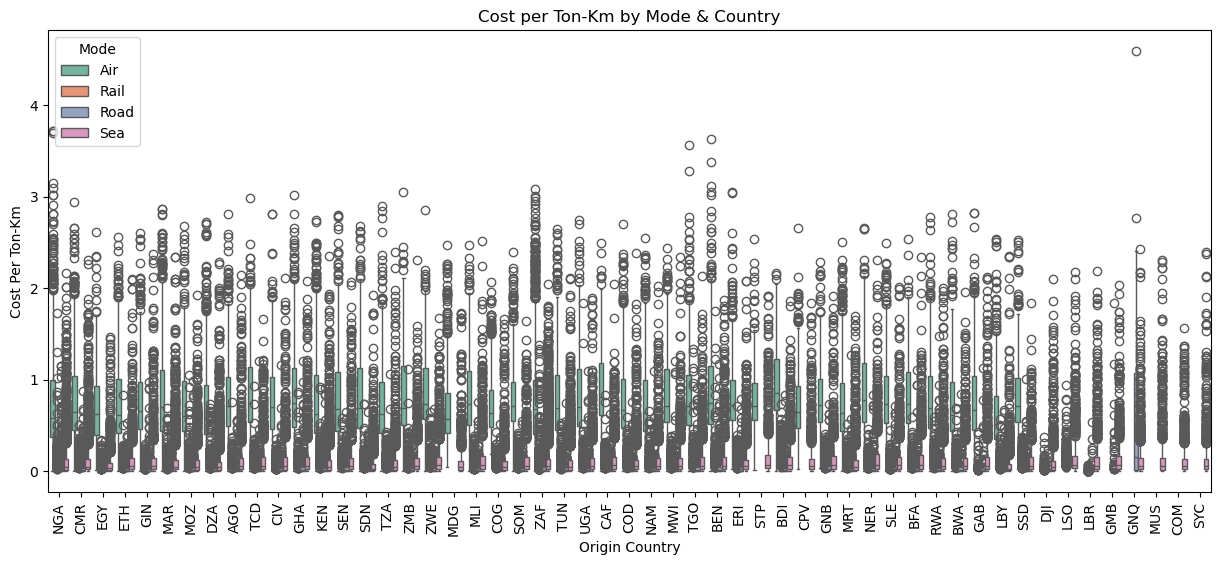

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define African countries for regional analysis
african_countries = ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", "CAF", "TCD", 
                     "COM", "COG", "COD", "DJI", "EGY", "GNQ", "ERI", "ETH", "GAB", "GMB",
                     "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI",
                     "MLI", "MRT", "MUS", "MYT", "MAR", "MOZ", "NAM", "NER", "NGA", "RWA",
                     "REU", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TGO",
                     "TUN", "UGA", "TZA", "ZMB", "ZWE"]

# Filter dataset for African trade routes
df_africa = df[(df["origin_ISO"].isin(african_countries)) & (df["destination_ISO"].isin(african_countries))]

# Identify top 10 most expensive transport routes
high_cost_routes = df_africa.groupby(["origin_ISO", "destination_ISO"])["Unit logistics costs ($/ton)"].mean().nlargest(10)
print("\nTop 10 Most Expensive Transport Routes:\n", high_cost_routes)

# Plot transport cost distribution by country
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_africa, x="origin_ISO", y="Unit logistics costs ($/ton)", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Transport Cost Distribution by Origin Country")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Origin Country")
plt.show()

# Define landlocked countries
landlocked_countries = ["BWA", "BFA", "BDI", "CAF", "TCD", "ETH", "LSO", "MWI", "MLI", "NER", "RWA", "SSD", "UGA", "ZMB", "ZWE"]
df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")

# Boxplot: Transport costs for Landlocked vs Coastal countries
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_africa, x="landlocked", y="log_Unit_logistics_costs", palette="magma")
plt.title("Transport Costs for Landlocked vs Coastal Countries")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Region Type")
plt.show()

# Identify countries with highest cost per ton-km
df_africa["cost_per_ton_km"] = df_africa["Unit logistics costs ($/ton)"] / df_africa["distance(km)"]
high_cost_countries = df_africa.groupby("origin_ISO")["cost_per_ton_km"].mean().nlargest(10)
print("\nTop 10 Countries with Highest Cost per Ton-Km:\n", high_cost_countries)

# Transport inefficiencies: Heatmap of cost disparities by mode
plt.figure(figsize=(12, 6))
cost_pivot = df_africa.pivot_table(index="origin_ISO", columns="Mode_name", values="Unit logistics costs ($/ton)", aggfunc="mean")
sns.heatmap(cost_pivot, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Transport Costs by Mode & Country")
plt.ylabel("Origin Country")
plt.xlabel("Transport Mode")
plt.show()


# Boxplot: Transport mode inefficiencies by country
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_africa, x="origin_ISO", y="log_cost_per_ton_km", hue="Mode_name", palette="Set2")
plt.xticks(rotation=90)
plt.title("Cost per Ton-Km by Mode & Country")
plt.ylabel("Log Cost Per Ton-Km")
plt.xlabel("Origin Country")
plt.legend(title="Mode")
plt.show()


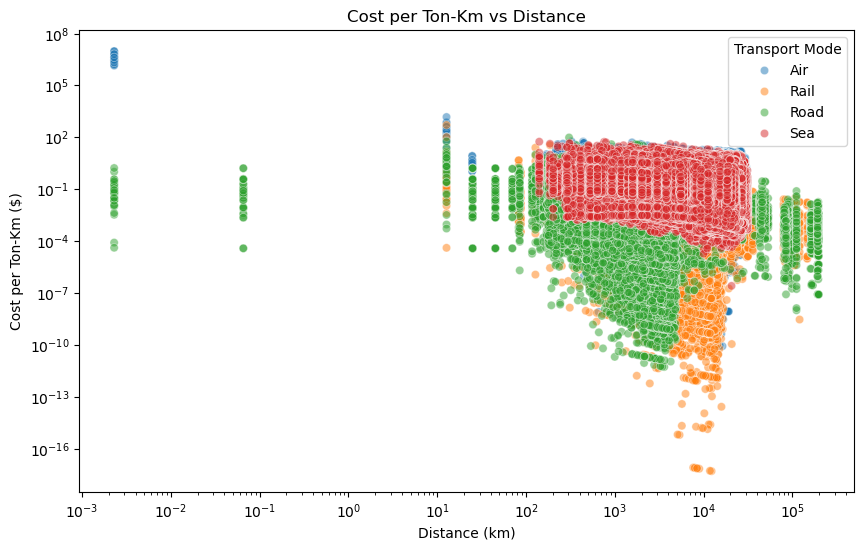

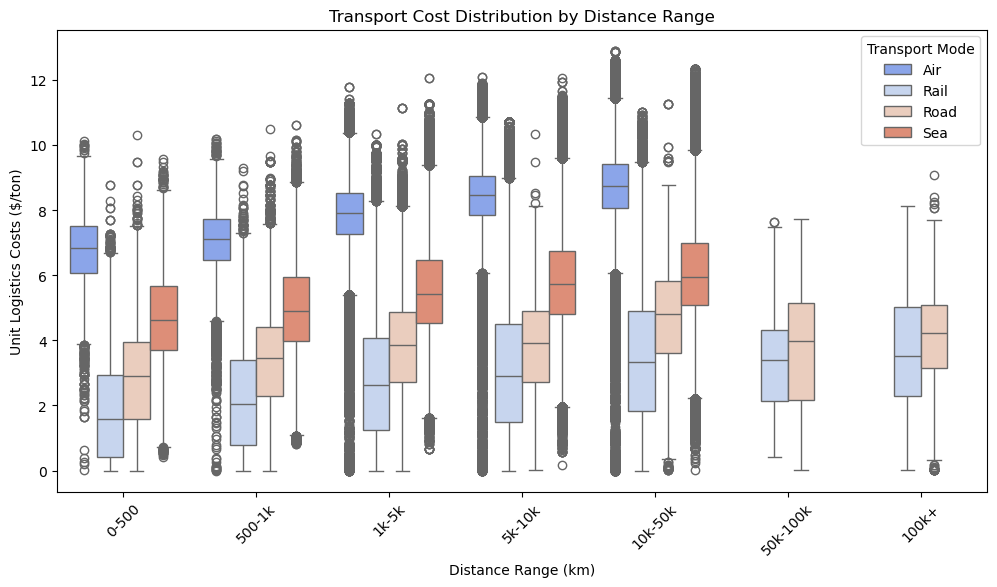

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/2651375963.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_distance = df.groupby(["distance_category", "Mode_name"])["cost_per_ton_km"].mean().reset_index()


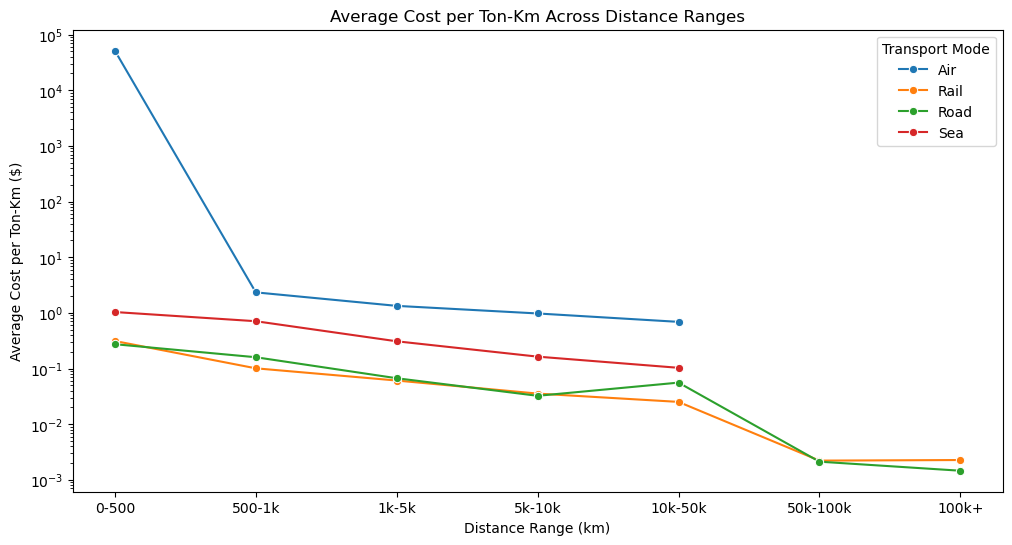

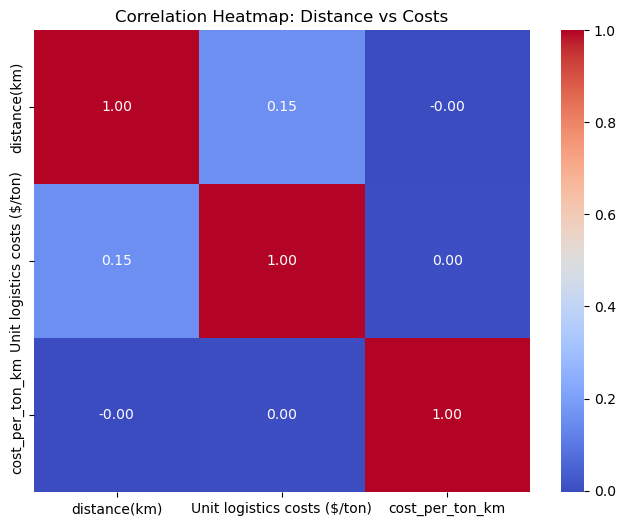


Top 10 Most Inefficient Routes (High Cost per Ton-Km):
         origin_ISO destination_ISO  distance(km)  \
3443439        PSE             ISR      0.002297   
3337457        ISR             PSE      0.002297   
3337448        ISR             PSE      0.002297   
3337460        ISR             PSE      0.002297   
3443430        PSE             ISR      0.002297   
3443442        PSE             ISR      0.002297   
3443427        PSE             ISR      0.002297   
3337445        ISR             PSE      0.002297   
3337449        ISR             PSE      0.002297   
3443431        PSE             ISR      0.002297   

         Unit logistics costs ($/ton)  cost_per_ton_km Mode_name  
3443439                  22094.084946     9.620221e+06       Air  
3337457                  21847.008227     9.512639e+06       Air  
3337448                  20086.642297     8.746139e+06       Air  
3337460                  17040.754881     7.419897e+06       Air  
3443430                  14938.6635

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert distance and cost columns to numeric
df["distance(km)"] = pd.to_numeric(df["distance(km)"], errors="coerce")
df["Unit logistics costs ($/ton)"] = pd.to_numeric(df["Unit logistics costs ($/ton)"], errors="coerce")

# Calculate cost per ton-km
df["cost_per_ton_km"] = df["Unit logistics costs ($/ton)"] / df["distance(km)"]

# Remove potential infinite values (cases where distance is zero)
df = df.replace([float("inf"), -float("inf")], None).dropna()

# 🔹 **1. Scatter Plot: Cost per Ton-Km vs Distance**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance(km)", y="cost_per_ton_km", hue="Mode_name", alpha=0.5)
plt.xscale("log")  # Log scale to handle wide range of distances
plt.yscale("log")  # Log scale for better visualization of cost variations
plt.title("Cost per Ton-Km vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Cost per Ton-Km ($)")
plt.legend(title="Transport Mode")
plt.show()

# 🔹 **2. Boxplot: Transport Cost Distribution Across Distance Ranges**
df["distance_category"] = pd.cut(df["distance(km)"], bins=[0, 500, 1000, 5000, 10000, 50000, 100000, df["distance(km)"].max()], 
                                 labels=["0-500", "500-1k", "1k-5k", "5k-10k", "10k-50k", "50k-100k", "100k+"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="distance_category", y="log_Unit_logistics_costs", hue="Mode_name", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Transport Cost Distribution by Distance Range")
plt.xlabel("Distance Range (km)")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.legend(title="Transport Mode")
plt.show()

# 🔹 **3. Line Plot: Average Cost per Ton-Km Across Distance Ranges**
avg_cost_distance = df.groupby(["distance_category", "Mode_name"])["cost_per_ton_km"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_cost_distance, x="distance_category", y="cost_per_ton_km", hue="Mode_name", marker="o")
plt.yscale("log")
plt.title("Average Cost per Ton-Km Across Distance Ranges")
plt.xlabel("Distance Range (km)")
plt.ylabel("Average Cost per Ton-Km ($)")
plt.legend(title="Transport Mode")
plt.show()

# 🔹 **4. Correlation Analysis: Distance vs Transport Costs**
plt.figure(figsize=(8, 6))
sns.heatmap(df[["distance(km)", "Unit logistics costs ($/ton)", "cost_per_ton_km"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Distance vs Costs")
plt.show()

# 🔹 **5. Identifying Inefficient Transport Costs for Given Distance**
# Sort by cost per ton-km and highlight top 10 most inefficient routes
inefficient_routes = df.nlargest(10, "cost_per_ton_km")[["origin_ISO", "destination_ISO", "distance(km)", "Unit logistics costs ($/ton)", "cost_per_ton_km", "Mode_name"]]
print("\nTop 10 Most Inefficient Routes (High Cost per Ton-Km):\n", inefficient_routes)



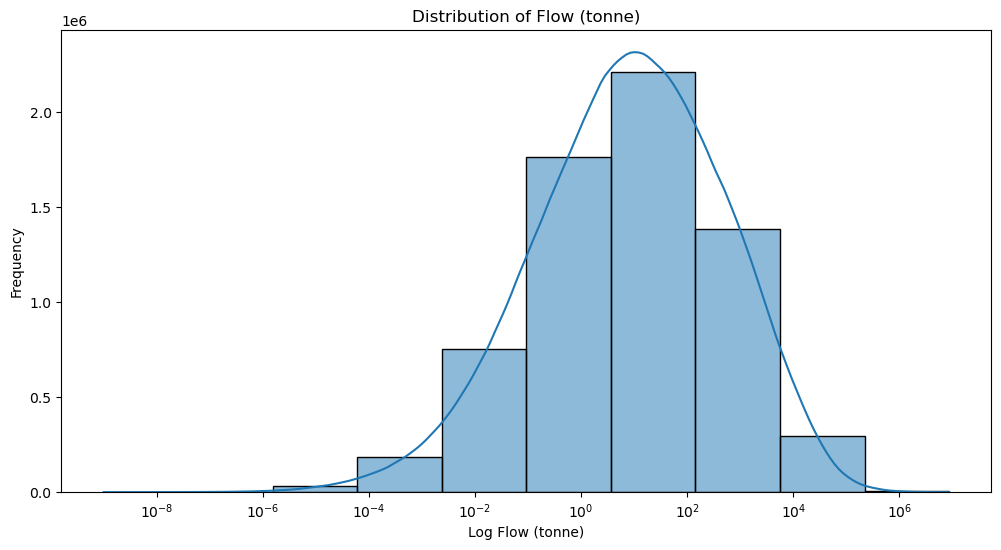

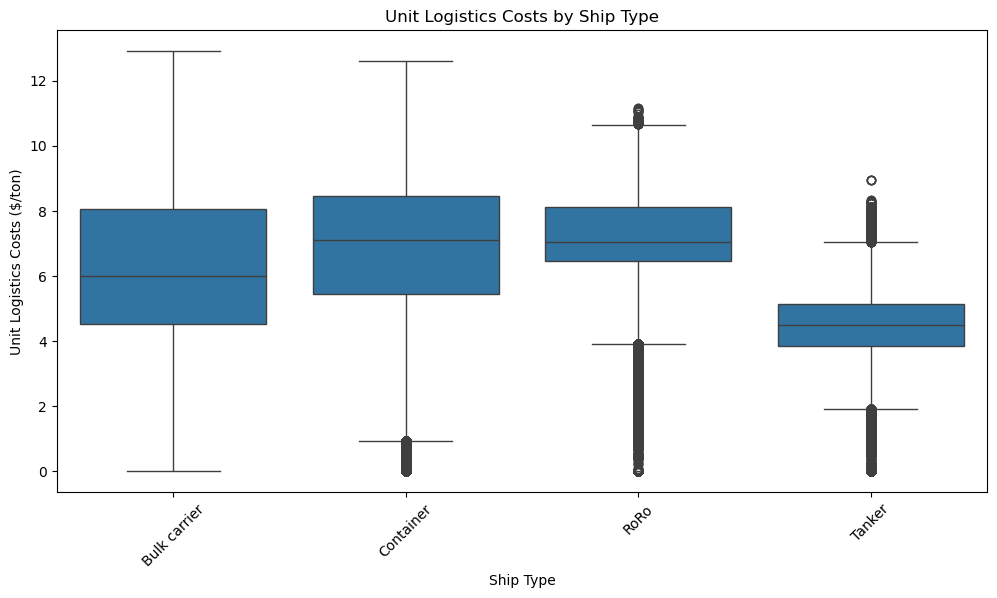

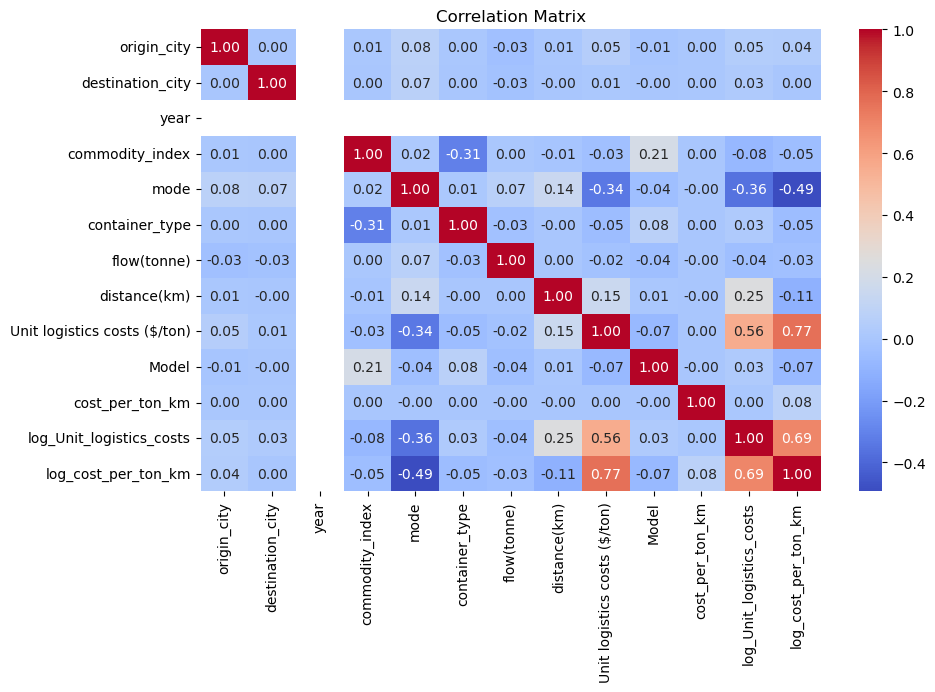

In [36]:
# Distribution of numerical variables
plt.figure(figsize=(12, 6))
sns.histplot(log_scale=True, data=df["flow(tonne)"], bins=10, kde=True)
plt.title("Distribution of Flow (tonne)")
plt.xlabel("Log Flow (tonne)")
plt.ylabel("Frequency")
plt.show()

# Boxplot of logistics cost by ship type
plt.figure(figsize=(12, 6))
sns.boxplot(x="ship_type", y="log_Unit_logistics_costs", data=df)
plt.xticks(rotation=45)
plt.title("Unit Logistics Costs by Ship Type")
plt.xlabel("Ship Type")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()



In [ ]:
!pip uninstall ace_tools

Found existing installation: ace_tools 0.0
Uninstalling ace_tools-0.0:
  Would remove:
    /opt/anaconda3/lib/python3.11/site-packages/ace_tools-0.0.dist-info/*
Proceed (Y/n)? ^C


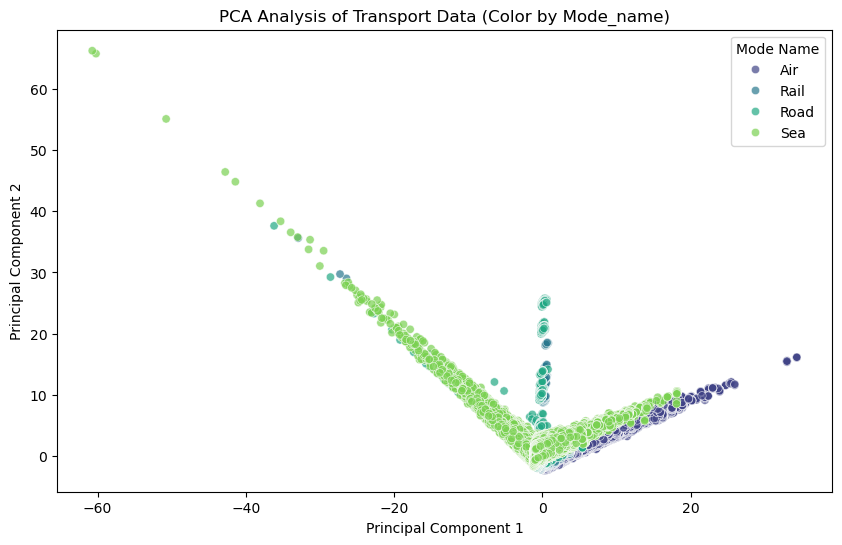

Statistical Tests for Mode_name
   ANOVA Test (Mode_name vs. Unit Logistics Costs)  \
0                                              0.0   

   Chi-Square Test (Mode_name vs. Container Type)  
0                                             0.0  

Correlation Matrix
                              origin_city  destination_city  year  \
origin_city                      1.000000          0.002078   NaN   
destination_city                 0.002078          1.000000   NaN   
year                                  NaN               NaN   NaN   
commodity_index                  0.006559          0.001186   NaN   
mode                             0.078679          0.072785   NaN   
container_type                   0.003566          0.001652   NaN   
flow(tonne)                     -0.033046         -0.026780   NaN   
distance(km)                     0.005923         -0.002032   NaN   
Unit logistics costs ($/ton)     0.051737          0.009080   NaN   
Model                           -0.009294    

In [46]:
# Encoding Mode_name for statistical tests
import scipy.stats as stats
#import ace_tools as tools
df["Mode_name_encoded"] = df["Mode_name"].astype("category").cat.codes

# ANOVA Test - Checking if Mode_name significantly affects Unit Logistics Costs
anova_mode_logistics = stats.f_oneway(
    *[df[df["Mode_name"] == mode]["Unit logistics costs ($/ton)"] for mode in df["Mode_name"].unique()]
)

# Chi-Square Test - Mode_name vs. Container Type
contingency_mode_container = pd.crosstab(df["Mode_name"], df["container_type"])
chi2_mode_container = stats.chi2_contingency(contingency_mode_container)

# Correlation Analysis (Mode_name encoded with numerical variables)
correlation_matrix = df.corr(numeric_only=True)

# Principal Component Analysis (PCA) for multivariate analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numeric variables for PCA
numeric_features = ["flow(tonne)", "Unit logistics costs ($/ton)", "distance(km)", "container_type", "Mode_name_encoded"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_features])

pca = PCA(n_components=2)  # Reducing to 2 principal components for visualization
pca_result = pca.fit_transform(scaled_data)

# Add PCA results back to dataframe
df["PCA1"] = pca_result[:, 0]
df["PCA2"] = pca_result[:, 1]

# Plot PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Mode_name", data=df, palette="viridis", alpha=0.7)
plt.title("PCA Analysis of Transport Data (Color by Mode_name)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Mode Name")
plt.show()

# Display statistical test results
mode_stat_results = pd.DataFrame({
    "ANOVA Test (Mode_name vs. Unit Logistics Costs)": [anova_mode_logistics.pvalue],
    "Chi-Square Test (Mode_name vs. Container Type)": [chi2_mode_container[1]],
})

print("Statistical Tests for Mode_name")
print(mode_stat_results)

print("\nCorrelation Matrix")
print(correlation_matrix)


Additional Statistical Tests for Mode_name
   ANOVA Test (Mode_name vs. Flow (tonne))  \
0                                      0.0   

   ANOVA Test (Mode_name vs. Distance (km))  \
0                                       0.0   

   Chi-Square Test (Mode_name vs. Commodity Index)  \
0                                              0.0   

   Chi-Square Test (Mode_name vs. Container Type)  
0                                             0.0  

Correlation Matrix


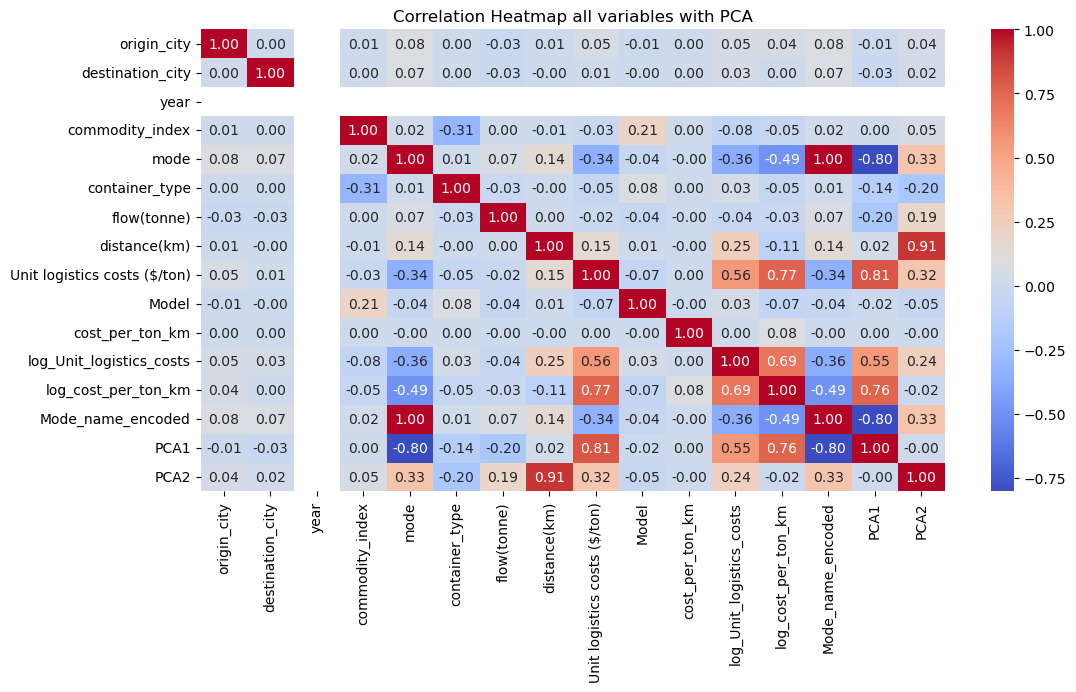

In [49]:
# Ensure the dataframe is defined before proceeding with statistical tests
if 'df' in locals() or 'df' in globals():
    
    # Encoding Mode_name for statistical tests
    df["Mode_name_encoded"] = df["Mode_name"].astype("category").cat.codes

    # 1. ANOVA Test: Mode_name vs. Flow (tonne)
    if df["Mode_name"].nunique() > 1:
        anova_mode_flow = stats.f_oneway(
            *[df[df["Mode_name"] == mode]["flow(tonne)"] for mode in df["Mode_name"].unique()]
        )
        anova_flow_p_value = anova_mode_flow.pvalue
    else:
        anova_flow_p_value = None  # Not applicable

    # 2. ANOVA Test: Mode_name vs. Distance (km)
    if df["Mode_name"].nunique() > 1:
        anova_mode_distance = stats.f_oneway(
            *[df[df["Mode_name"] == mode]["distance(km)"] for mode in df["Mode_name"].unique()]
        )
        anova_distance_p_value = anova_mode_distance.pvalue
    else:
        anova_distance_p_value = None  # Not applicable

    # 3. Chi-Square Test: Mode_name vs. Commodity Index
    if df["Mode_name"].nunique() > 1 and df["commodity_index"].nunique() > 1:
        contingency_mode_commodity = pd.crosstab(df["Mode_name"], df["commodity_index"])
        chi2_mode_commodity = stats.chi2_contingency(contingency_mode_commodity)
        chi2_commodity_p_value = chi2_mode_commodity[1]
    else:
        chi2_commodity_p_value = None  # Not applicable

    # 4. Chi-Square Test: Mode_name vs. Container Type
    if df["Mode_name"].nunique() > 1 and df["container_type"].nunique() > 1:
        contingency_mode_container = pd.crosstab(df["Mode_name"], df["container_type"])
        chi2_mode_container = stats.chi2_contingency(contingency_mode_container)
        chi2_container_p_value = chi2_mode_container[1]
    else:
        chi2_container_p_value = None  # Not applicable

    # 5. Correlation Analysis (Mode_name encoded with numerical variables)
    correlation_matrix = df.corr(numeric_only=True)

    # Display statistical test results
    mode_stat_results = pd.DataFrame({
        "ANOVA Test (Mode_name vs. Flow (tonne))": [anova_flow_p_value],
        "ANOVA Test (Mode_name vs. Distance (km))": [anova_distance_p_value],
        "Chi-Square Test (Mode_name vs. Commodity Index)": [chi2_commodity_p_value],
        "Chi-Square Test (Mode_name vs. Container Type)": [chi2_container_p_value],
    })

    # Print results
    print("Additional Statistical Tests for Mode_name")
    print(mode_stat_results)

    print("\nCorrelation Matrix")
    plt.figure(figsize=(12, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Correlation Heatmap all variables with PCA')
    plt.show()

else:
    print("Error: The dataframe 'df' is not defined. Please ensure your dataset is loaded before running this code.")


In [48]:
anova_mode_flow

F_onewayResult(statistic=10403.664060626663, pvalue=0.0)

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Selecting relevant numeric features for clustering
clustering_features = ["flow(tonne)", "Unit logistics costs ($/ton)", "distance(km)", "container_type"]
scaled_data = scaler.fit_transform(df[clustering_features])

# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
k_values = range(2, 7)  # Testing between 2 and 6 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

# Find the best number of clusters based on the highest silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Perform K-Means clustering with the optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["Cluster"] = kmeans_final.fit_predict(scaled_data)

# Scatter plot to visualize clustering results using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["Cluster"], palette="viridis", alpha=0.7)
plt.title(f"K-Means Clustering (k={optimal_k}) on Transport Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Display cluster statistics
cluster_summary = df.groupby("Cluster")[clustering_features].mean()
print(cluster_summary)


KeyboardInterrupt: 

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/1416035040.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


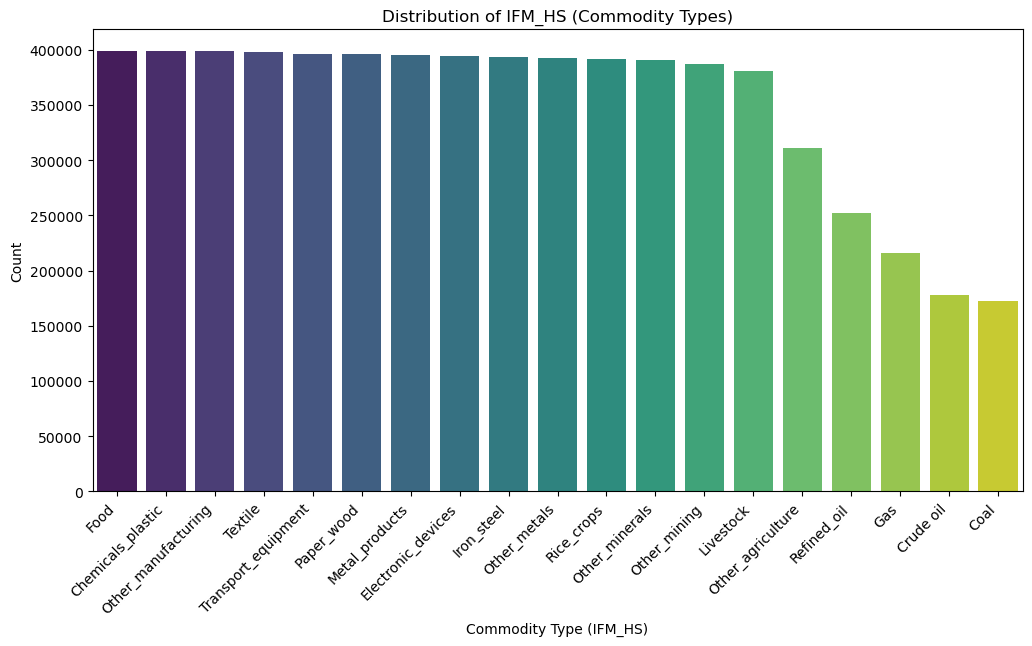

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_7005/1416035040.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="IFM_HS", y="log_Unit_logistics_costs", palette="viridis")


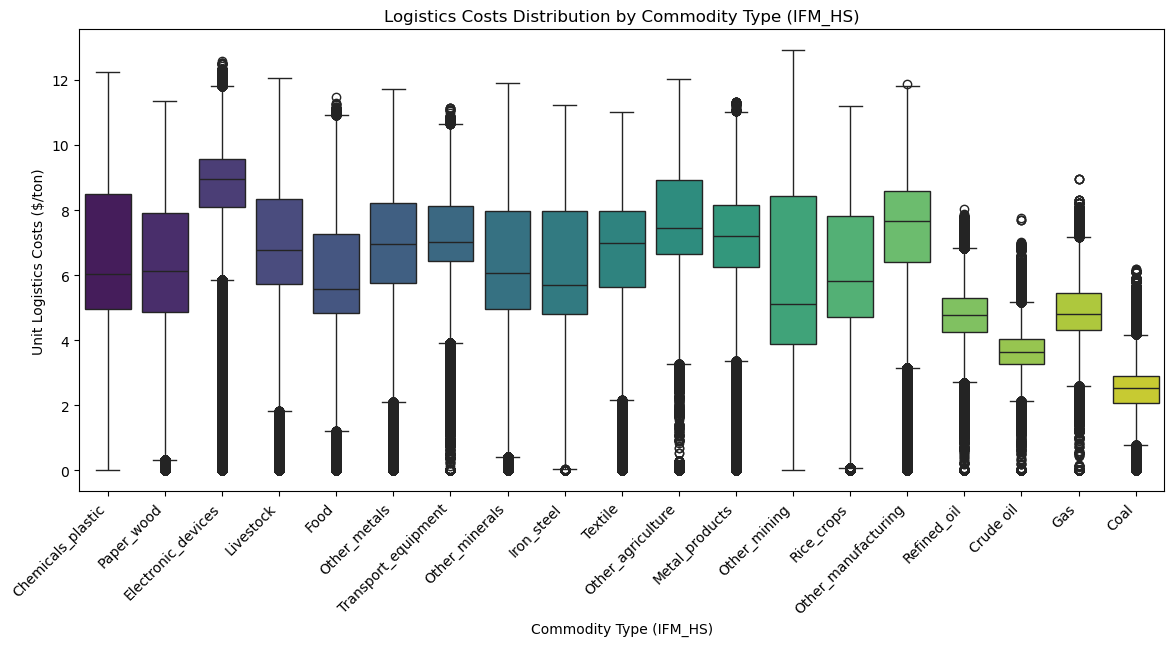

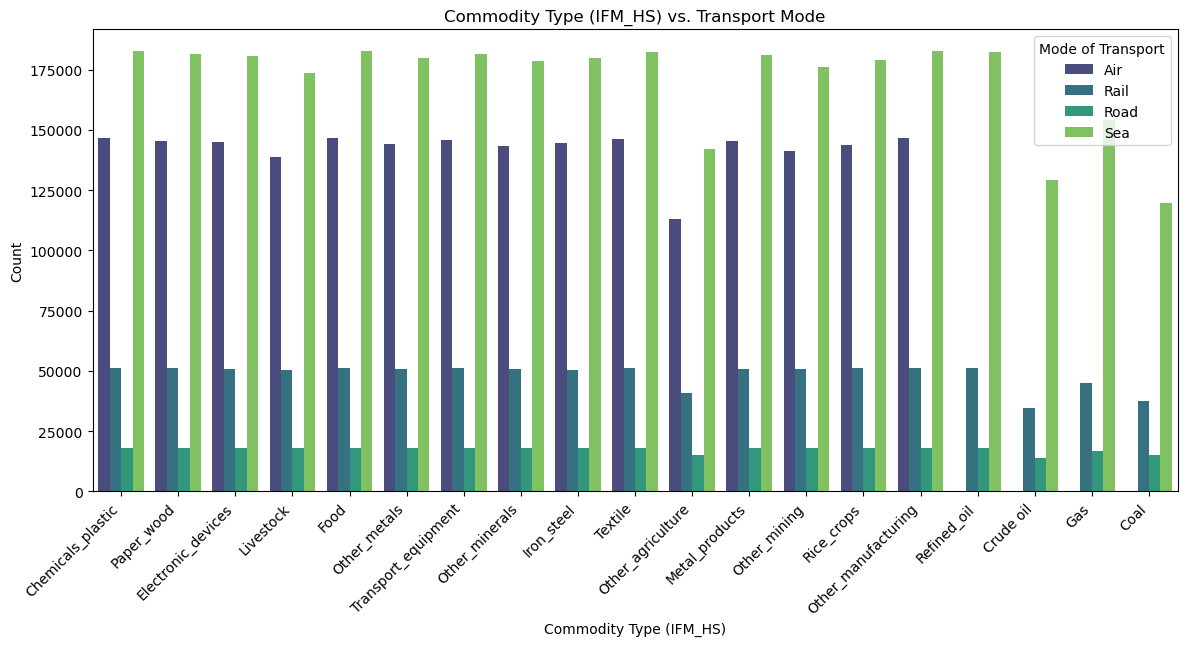

   Chi-Square Test (IFM_HS vs. Mode_name) Interpretation
0                                     0.0    Significant


In [52]:
# Check the distribution of the IFM_HS variable
if "IFM_HS" in df.columns:
    # Count occurrences of each category
    category_counts = df["IFM_HS"].value_counts()

    # Bar plot for IFM_HS distribution
    plt.figure(figsize=(12, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribution of IFM_HS (Commodity Types)")
    plt.xlabel("Commodity Type (IFM_HS)")
    plt.ylabel("Count")
    plt.show()

    # Analyze cost variations across IFM_HS categories
    plt.figure(figsize=(14, 6))
    sns.boxplot(data=df, x="IFM_HS", y="log_Unit_logistics_costs", palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title("Logistics Costs Distribution by Commodity Type (IFM_HS)")
    plt.xlabel("Commodity Type (IFM_HS)")
    plt.ylabel("Unit Logistics Costs ($/ton)")
    plt.show()

    # Check if certain commodities are more associated with specific transport modes
    plt.figure(figsize=(14, 6))
    sns.countplot(data=df, x="IFM_HS", hue="Mode_name", palette="viridis")
    plt.xticks(rotation=45, ha="right")
    plt.title("Commodity Type (IFM_HS) vs. Transport Mode")
    plt.xlabel("Commodity Type (IFM_HS)")
    plt.ylabel("Count")
    plt.legend(title="Mode of Transport")
    plt.show()

    # Perform a Chi-Square test to see if IFM_HS and Mode_name are dependent
    contingency_table = pd.crosstab(df["IFM_HS"], df["Mode_name"])
    chi2_stat, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Display the statistical test result
    chi2_result = pd.DataFrame({
        "Chi-Square Test (IFM_HS vs. Mode_name)": [chi2_p_value],
        "Interpretation": ["Significant" if chi2_p_value < 0.05 else "Not Significant"]
    })

    print(chi2_result)

else:
    print("Error: The column 'IFM_HS' is not present in the dataset.")


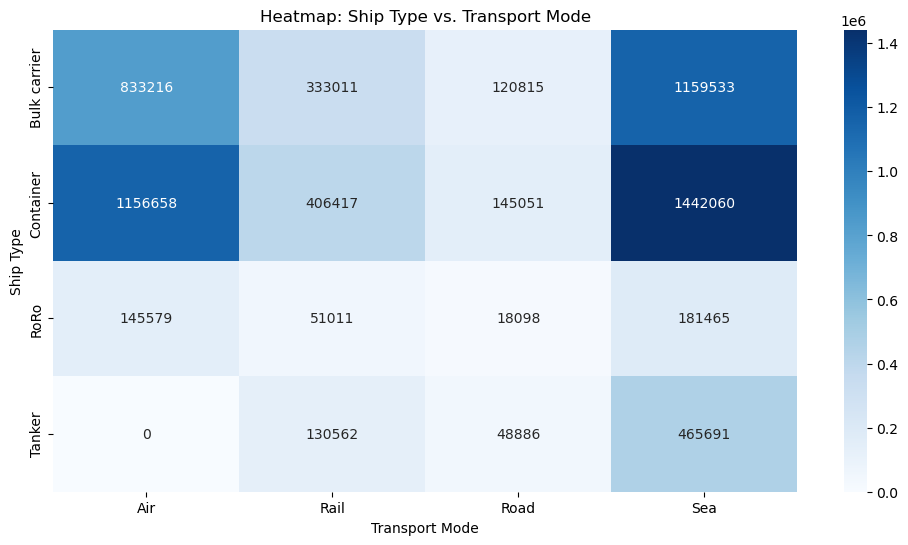

In [ ]:
# Ensure required columns are available
if "ship_type" in df.columns and "Mode_name" in df.columns:

    # 1. Heatmap: Relationship Between Ship Type and Transport Mode
    plt.figure(figsize=(12, 6))
    ship_mode_heatmap = pd.crosstab(df["ship_type"], df["Mode_name"])
    sns.heatmap(ship_mode_heatmap, annot=True, cmap="Blues", fmt="d")
    plt.title("Heatmap: Ship Type vs. Transport Mode")
    plt.xlabel("Transport Mode")
    plt.ylabel("Ship Type")
    plt.show()

    # # 2. Swarm Plot: Logistics Costs Distribution by Ship Type and Mode
    # plt.figure(figsize=(14, 6))
    # sns.swarmplot(data=df, x="ship_type", y="Unit logistics costs ($/ton)", hue="Mode_name", palette="coolwarm", dodge=True)
    # plt.xticks(rotation=45, ha="right")
    # plt.title("Swarm Plot: Logistics Costs by Ship Type and Transport Mode")
    # plt.xlabel("Ship Type")
    # plt.ylabel("Unit Logistics Costs ($/ton)")
    # plt.legend(title="Transport Mode")
    # plt.show()

    # 3. Violin Plot: Distribution of Logistics Costs
    plt.figure(figsize=(14, 6))
    sns.violinplot(data=df, x="ship_type", y="Unit logistics costs ($/ton)", hue="Mode_name", split=True, palette="coolwarm")
    plt.xticks(rotation=45, ha="right")
    plt.title("Violin Plot: Logistics Costs by Ship Type and Transport Mode")
    plt.xlabel("Ship Type")
    plt.ylabel("Unit Logistics Costs ($/ton)")
    plt.legend(title="Transport Mode")
    plt.show()

    # 4. Ridgeline Plot: Density Distribution of Logistics Costs by Mode
    import joypy
    from matplotlib import cm

    plt.figure(figsize=(14, 6))
    joypy.joyplot(data=df, by="Mode_name", column="Unit logistics costs ($/ton)", colormap=cm.coolwarm)
    plt.title("Ridgeline Plot: Distribution of Logistics Costs by Transport Mode")
    plt.xlabel("Unit Logistics Costs ($/ton)")
    plt.show()

    # 5. Pair Grid: Pairwise Distribution of Key Features for Ship Type and Mode
    pairgrid = sns.PairGrid(df, hue="Mode_name", palette="coolwarm", corner=True)
    pairgrid.map_diag(sns.histplot, kde=True)
    pairgrid.map_lower(sns.kdeplot, cmap="coolwarm", fill=True)
    pairgrid.add_legend()
    plt.show()

else:
    print("Error: The column 'ship_type' or 'Mode_name' is not present in the dataset.")
